In [15]:
# import libraries
import pandas as pd 
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import warnings 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.datasets import make_blobs 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC 
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score 
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import SGDClassifier 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot 
from sklearn.model_selection import train_test_split 
init_notebook_mode(connected=True) 
import cufflinks as cf 
cf.go_offline()
import pickle
import gc
import lightgbm as lgb
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
house_loan = pd.read_csv("E:\\Docs\\Dataset\\loan_data.csv")
house_loan.describe() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [19]:
house_loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
house_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [18]:
house_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [20]:
house_loan.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [22]:
house_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
defaulters = (house_loan.TARGET==1).sum()
payers = (house_loan.TARGET==0).sum()
print((defaulters/payers)*100)

8.781828601345662


In [24]:
without_id=[column for column in house_loan.columns if column!='SK_ID_CURR']   
#check for duplicate values 
na=house_loan[house_loan.duplicated(subset=without_id,keep=False)]  
print("Duplicates are: ",na.shape[0]) 

Duplicates are:  0


<AxesSubplot:ylabel='TARGET'>

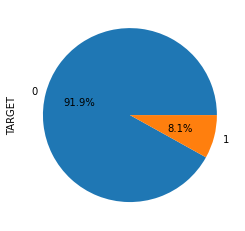

In [25]:
house_loan.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%') 

In [26]:
import matplotlib as plt 

In [35]:
shuffled_data=house_loan.sample(frac=1,random_state=3)
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1]

In [40]:
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825,random_state=3)

<AxesSubplot:ylabel='TARGET'>

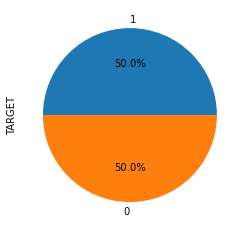

In [41]:
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan])
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [42]:
import tensorflow as tf 

In [43]:
normalised_home_loan.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 139806
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [44]:
normalised_home_loan.head 

<bound method NDFrame.head of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
207339      340318       1         Cash loans           F            N   
8756        110186       1         Cash loans           M            Y   
230344      366811       1         Cash loans           F            N   
178329      306645       1         Cash loans           M            Y   
55586       164407       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
303856      452050       0         Cash loans           F            N   
140173      262532       0         Cash loans           F            N   
44575       151640       0    Revolving loans           F            N   
106175      223189       0         Cash loans           F            N   
139806      262117       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
207339     

In [45]:
normalised_home_loan.dropna(axis=0) 
normalised_home_loan.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 139806
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [46]:
normalised_home_loan.isnull().sum() 

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7651
AMT_REQ_CREDIT_BUREAU_WEEK    7651
AMT_REQ_CREDIT_BUREAU_MON     7651
AMT_REQ_CREDIT_BUREAU_QRT     7651
AMT_REQ_CREDIT_BUREAU_YEAR    7651
Length: 122, dtype: int64

In [47]:
#print(normalised_home_loan.apply()) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY))  
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR)) 

[ 0. nan  1.  2.  4.  3.  5.]
[ 0. nan  1.  2.  4.  3.  5.  6.  8.]
[ 0. nan  1.  3.  5.  9.  2.  6.  8.  4. 11. 12.  7. 13. 10. 17. 15. 14.
 18. 23. 16.]
[ 0. nan  2.  3.  1.  4.  5.  6. 19.  7.  8.]
[ 3.  0. nan  1.  5.  4.  2.  6.  7.  8.  9. 10. 14. 13. 12. 11. 22. 16.
 25.]


In [48]:
normalised_home_loan.dropna(axis=0) 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
279124,423360,1,Cash loans,M,Y,N,1,157500.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
216116,350411,1,Cash loans,M,Y,N,0,112500.0,225000.0,25447.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
133687,255050,1,Cash loans,M,Y,N,1,337500.0,704844.0,26977.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4159,104863,1,Cash loans,M,Y,N,0,265500.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208602,341779,1,Cash loans,F,Y,Y,1,247500.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24112,128041,0,Cash loans,F,Y,Y,0,225000.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
301159,448898,0,Cash loans,F,Y,N,2,270000.0,1494486.0,43695.0,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,1.0
201406,333461,0,Revolving loans,M,Y,Y,0,270000.0,765000.0,38250.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
187247,317067,0,Cash loans,M,Y,Y,1,315000.0,1258650.0,53455.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0


In [49]:
print(normalised_home_loan.info()) 
print(normalised_home_loan.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 139806
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB
None
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7651
AMT_REQ_CREDIT_BUREAU_WEEK    7651
AMT_REQ_CREDIT_BUREAU_MON     7651
AMT_REQ_CREDIT_BUREAU_QRT     7651
AMT_REQ_CREDIT_BUREAU_YEAR    7651
Length: 122, dtype: int64


<AxesSubplot:ylabel='TARGET'>

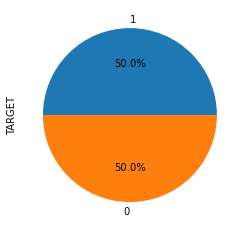

In [50]:
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

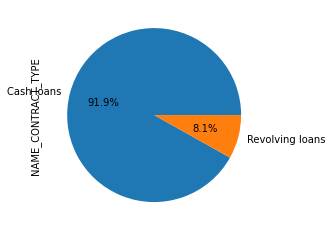

In [55]:
#high amount of cash loans 
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%")

<AxesSubplot:ylabel='CODE_GENDER'>

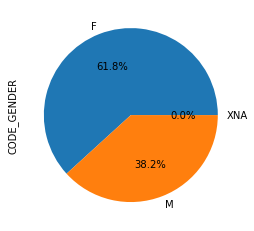

In [56]:
#roughly equal amount 
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%")  

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

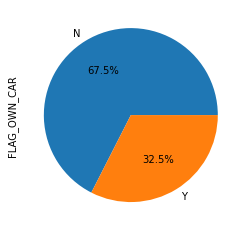

In [57]:
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<AxesSubplot:ylabel='CNT_CHILDREN'>

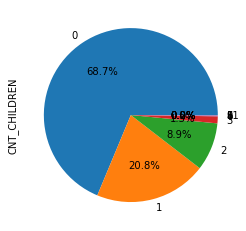

In [58]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.1f%%") 

In [60]:
cf.set_config_file(theme='polar')

In [71]:
normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].iplot(kind='histogram', bins=100,
   xTitle = 'Total Income', yTitle ='Count of applicants',
             title='Distribution of AMT_INCOME_TOTAL')

In [72]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]
 ['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] >1000000])*100

0    60.606061
1    39.393939
Name: TARGET, dtype: float64

In [73]:
#print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>1]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100) 
#as number of children is increasing lone defaulters are increasing

1    56.67107
0    43.32893
Name: TARGET, dtype: float64
1    90.0
0    10.0
Name: TARGET, dtype: float64


In [74]:
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100) 

#people with own cars are slighlty more likely to repay back the loan 

1    51.468043
0    48.531957
Name: TARGET, dtype: float64
0    53.049083
1    46.950917
Name: TARGET, dtype: float64


In [75]:
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100) 
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100) 

#men more likely to default in payment of loans

1    56.132125
0    43.867875
Name: TARGET, dtype: float64
0    53.793981
1    46.206019
Name: TARGET, dtype: float64


In [76]:
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans'])*100) 
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans'])*100) 

#cash loans have a higher percent of defaulters

1    50.913197
0    49.086803
Name: TARGET, dtype: float64
0    60.306855
1    39.693145
Name: TARGET, dtype: float64


In [77]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=5)

In [78]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']]) 
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
302218         Cash loans                      0.0
45058          Cash loans                      0.0
159305         Cash loans                      0.0
275427         Cash loans                      0.0
41564          Cash loans                      0.0
192094         Cash loans                      0.0
235115    Revolving loans                      1.0
79051          Cash loans                      0.0
302631         Cash loans                      0.0
225004         Cash loans                      0.0
128624         Cash loans                      0.0
211536         Cash loans                      0.0
243761         Cash loans                      0.0
288269         Cash loans                      0.0
171791         Cash loans                      0.0
151071         Cash loans                      0.0
118237         Cash loans                      0.0
115069         Cash loans                      0.0
78789          Cash loans      

In [79]:
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']]) 
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
302218           M               1.0
45058            F               0.0
159305           M               1.0
275427           F               0.0
41564            F               0.0
192094           M               1.0
235115           F               0.0
79051            F               0.0
302631           F               0.0
225004           M               1.0
128624           M               1.0
211536           F               0.0
243761           M               1.0
288269           F               0.0
171791           F               0.0
151071           M               1.0
118237           F               0.0
115069           F               0.0
78789            F               0.0
249976           F               0.0
0.0    30667
1.0    18982
2.0        1
Name: CODE_GENDER_CODE, dtype: int64


In [80]:
#2 other values in code_gender
normalised_home_loan.loc[normalised_home_loan['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [81]:
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']]) 
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
302218            N                0.0
45058             Y                1.0
159305            N                0.0
275427            N                0.0
41564             N                0.0
192094            N                0.0
235115            N                0.0
79051             N                0.0
302631            N                0.0
225004            Y                1.0
128624            N                0.0
211536            N                0.0
243761            Y                1.0
288269            Y                1.0
171791            N                0.0
151071            Y                1.0
118237            N                0.0
115069            N                0.0
78789             N                0.0
249976            N                0.0
0.0    33514
1.0    16136
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [82]:
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']]) 
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
302218                0.0             0
45058                 0.0             0
159305                2.0             2
275427                0.0             0
41564                 0.0             0
192094                0.0             0
235115                0.0             0
79051                 0.0             0
302631                0.0             0
225004                0.0             0
128624                0.0             0
211536                0.0             0
243761                0.0             0
288269                0.0             0
171791                1.0             1
151071                0.0             0
118237                2.0             2
115069                0.0             0
78789                 0.0             0
249976                0.0             0
0.0    34113
1.0    10351
2.0     4429
3.0      645
4.0       88
5.0       14
6.0        7
7.0        2
8.0        1
Name: CNT_CHILDREN_CODE, dtype: int64


In [83]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=45)
normalised_home_loan['TARGET'].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [84]:
y=normalised_home_loan.TARGET 
#y=y.sample(frac=1,random_state=45)

In [85]:
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']

In [86]:
from sklearn.model_selection import train_test_split
X=normalised_home_loan[normalised_home_loan_features] 
#X=X.sample(frac=1,random_state=45)

In [87]:
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


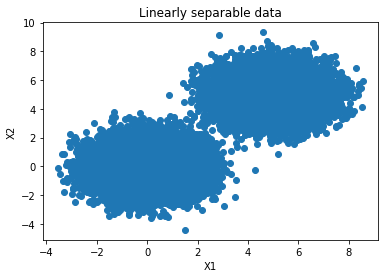

In [88]:
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.title('Linearly separable data')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()


In [89]:
from sklearn import svm 
from sklearn.metrics import plot_confusion_matrix

In [90]:
clf=svm.SVC(kernel='linear')
clf=clf.fit(X_train,y_train)

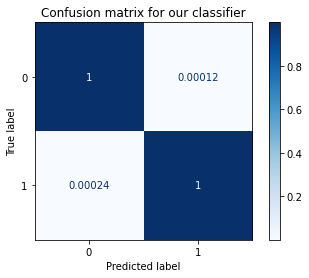

In [91]:
predictions = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.pyplot.title('Confusion matrix for our classifier')
plt.pyplot.show(matrix)
plt.pyplot.show()

In [92]:
from sklearn.metrics import precision_score, recall_score,f1_score


In [93]:
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions)) 
print(f1_score(y_test,predictions,average=None))

0.999878108239883
0.9997562461913467
[0.99981664 0.99981717]


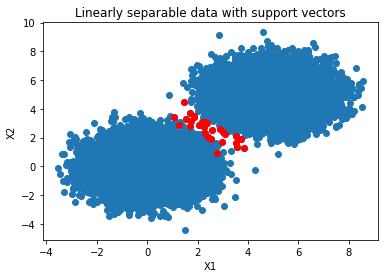

In [94]:
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.pyplot.title('Linearly separable data with support vectors')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()

In [97]:
from mlxtend.plotting import plot_decision_regions


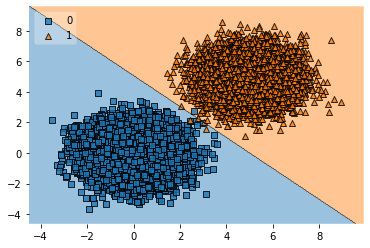

In [98]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.pyplot.show()
